<h1 style="color:rgb(0,120,170)">Assignment 6: Gradient Descent</h1>
<h2 style="color:rgb(0,120,170)">Machine Learning: Theoretical Concepts, SS 2019</h2>

<h3 style="color:rgb(0,120,170)">Deadline: see Moodle</h3>
Return this notebook with your code and answers.

Reconsider assignment 4 where you used gradient descent for logistic regression. Now we are going to compare different methods of adjusting the learning rate for logistic regression. For this you can either use the implementation provided in this notebook or your own implementation from assignment 4. If you use your own implementation, make sure to add a bias/intercept unit to your model!

For the following tasks use the dataset `dataset-cf10-46.csv` that consists of $32 \times 32$ pixel images of cats and dogs. Note that the first column is the class label, the remaining columns contain the gray scale pixel intensities. If you want to visualize the data, you can do this using the
following function `plot_image`.

Split the dataset into 50% test set, 30% training set and 20% validation set. Use the validation set to find optimal hyperparameters in some of the subproblems of this exercise. Run your program always for 5000 full-batch iterations. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def logistic_gradient(w, x, y):
    sigma = 1.0 / (1.0 + np.exp(-np.matmul(w, x)))
    return np.sum(x * (sigma - y), 1)


def cost(w, x, y):
    sigma = 1.0 / (1.0 + np.exp(-np.matmul(w, x)))
    return np.sum(-y * np.log(sigma) - (1.0 - y) * (np.log(1.0 - sigma)))


def fitLogRegModel(x, y, eta, epochs=5000, log_interval=500, momentum=None, verbose=False):
    x = x.T
    w = np.random.uniform(-0.1, 0.1, size=[x.shape[0] + 1])
    # no previous delta
    d_wn = 0
    x = np.concatenate([x, np.ones((1, x.shape[1]))], axis=0)
    c = cost(w, x, y)
    if verbose:
        print("inital cost: ", c)
    for i in range(epochs):
        if momentum:
            d_wn = -eta * logistic_gradient(w, x, y) + momentum * d_wn
            w += d_wn
        else:
            w -= eta * logistic_gradient(w, x, y)
        c = cost(w, x, y)
        if verbose and (i + 1) % log_interval == 0:
            print(c)
    if verbose:
        print("final cost: ", c)
    return w


def predictLogReg(w, xPred):
    xPred = np.concatenate([xPred, np.ones((1, xPred.shape[1]))], axis=0)
    return 1.0 / (1.0 + np.exp(-np.matmul(w, xPred)))


def plot_image(row):
    plt.figure(figsize=(7, 7))
    plt.imshow(np.reshape(row, (32, 32)), cmap="gray")
    plt.show()


np.random.seed(0)
data = np.genfromtxt('dataset-cf10-46.csv', delimiter=',', skip_header=True)
data_len = data.shape[0]
test_len = int(data_len * 0.5)
train_len = int(data_len * 0.3)
np.random.shuffle(data)
test_data = data[:test_len, 1:]
test_labels = (data[:test_len, 0] == 4.).astype(np.float)
train_data = data[test_len:(test_len + train_len), 1:]
train_labels = (data[test_len:(test_len + train_len), 0] == 4.).astype(
    np.float)
val_data = data[(test_len + train_len):, 1:]
val_labels = (data[(test_len + train_len):, 0] == 4.).astype(np.float)

### Plotting a single image

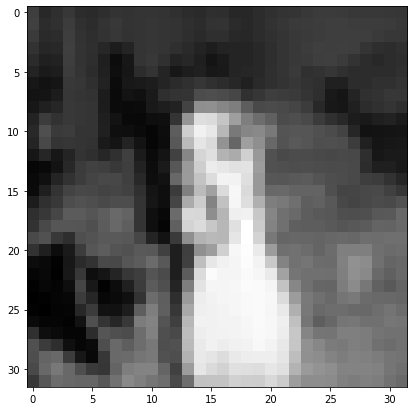

In [2]:
from ipywidgets import interact, IntSlider, IntRangeSlider

@interact(img=IntSlider(min=0, max=len(train_data)))
def plot_one_image(img):
    plot_image(train_data[img])

In [3]:
X_train, X_val = train_data, val_data
X_test, y_train = test_data, train_labels
y_val, y_test = val_labels, test_labels

## Task 1
Try to find a constant learning rate $\eta$ that gives you good results for the classification task described below. To do this, try at least 3 different choices for $\eta$. (30P)

In [4]:
def line_search_eta(X_train, X_test, y_train, y_test, etas):
    opt = None
    X = np.vstack((X_test.T, np.ones(X_test.shape[0])))

    for eta in etas:
        w = fitLogRegModel(X_train, y_train, eta)
        c = cost(w, X, y_test)
        if opt is None or c < opt['cost']:
            print('New optimal 𝜂 found!')
            print(f'Old 𝜂 was: {opt}')
            opt = {'w': w, '𝜂': eta, 'cost': c}
            print(f'New optimal 𝜂: {opt}\n')

    return opt

In [5]:
start_eta = -10
end_eta = -5

In [6]:
@interact(etas=IntRangeSlider(min=-10,
                              max=-5,
                              value=(start_eta, end_eta),
                              description='etas base 10:'))
def get_etas(etas):
    global start_eta, end_eta
    start_eta, end_eta = etas

interactive(children=(IntRangeSlider(value=(-10, -5), description='etas base 10:', max=-5, min=-10), Output())…

In [7]:
steps_eta = (end_eta - start_eta) * 2
etas = np.logspace(start_eta, end_eta, steps_eta)
print(etas)

[1.00000000e-10 3.59381366e-10 1.29154967e-09 4.64158883e-09
 1.66810054e-08 5.99484250e-08 2.15443469e-07 7.74263683e-07
 2.78255940e-06 1.00000000e-05]


In [8]:
best_eta = line_search_eta(X_train, X_val, y_train, y_val, etas)

New optimal 𝜂 found!
Old 𝜂 was: None
New optimal 𝜂: {'w': array([ 0.05410822, -0.00575195,  0.08416298, ..., -0.08703995,
        0.03416205, -0.06006317]), '𝜂': 1e-10, 'cost': 1026.1210263392045}

New optimal 𝜂 found!
Old 𝜂 was: {'w': array([ 0.05410822, -0.00575195,  0.08416298, ..., -0.08703995,
        0.03416205, -0.06006317]), '𝜂': 1e-10, 'cost': 1026.1210263392045}
New optimal 𝜂: {'w': array([ 0.08426172, -0.06904278,  0.02355034, ...,  0.03272793,
       -0.09841147, -0.077335  ]), '𝜂': 3.593813663804626e-10, 'cost': 738.9414488814813}

New optimal 𝜂 found!
Old 𝜂 was: {'w': array([ 0.08426172, -0.06904278,  0.02355034, ...,  0.03272793,
       -0.09841147, -0.077335  ]), '𝜂': 3.593813663804626e-10, 'cost': 738.9414488814813}
New optimal 𝜂: {'w': array([-0.00164597, -0.06558004, -0.01751935, ..., -0.00682596,
       -0.05837557,  0.0903722 ]), '𝜂': 4.641588833612773e-09, 'cost': 712.2335166785931}

New optimal 𝜂 found!
Old 𝜂 was: {'w': array([-0.00164597, -0.06558004, -0.0175193

## Task 2
Use a constant learning rate that worked well in task 1 and add a momentum term $\mu$. Try at least 3 different choices for $\mu$. (30P)

In [9]:
def line_search_mu(X_train, X_test, y_train, y_test, eta, mus):
    opt = None
    X = np.vstack((X_test.T, np.ones(X_test.shape[0])))

    for mu in mus:
        w = fitLogRegModel(X_train, y_train, eta, momentum=mu)
        c = cost(w, X, y_test)
        if opt is None or c < opt['cost']:
            print('New optimal 𝜇 found!')
            print(f'Old 𝜇 was: {opt}')
            opt = {'w': w, '𝜂': eta, '𝜇': mu, 'cost': c}
            print(f'New optimal 𝜇: {opt}\n')

    return opt

In [10]:
start_mom = -10
end_mom = -5

In [11]:
@interact(mus=IntRangeSlider(min=-10,
                             max=-5,
                             value=(start_mom, end_mom),
                             description='momentum base 10:'))
def get_etas(mus):
    global start_mom, end_mom
    start_mom, end_mom = mus

interactive(children=(IntRangeSlider(value=(-10, -5), description='momentum base 10:', max=-5, min=-10), Outpu…

In [12]:
steps_mom = (end_mom - start_mom) * 2
moms = np.logspace(start_mom, end_mom, steps_mom)
print(moms)

[1.00000000e-10 3.59381366e-10 1.29154967e-09 4.64158883e-09
 1.66810054e-08 5.99484250e-08 2.15443469e-07 7.74263683e-07
 2.78255940e-06 1.00000000e-05]


In [13]:
eta = best_eta['𝜂']
best_mu = line_search_mu(X_train, X_val, y_train, y_val, eta, moms)

New optimal 𝜇 found!
Old 𝜇 was: None
New optimal 𝜇: {'w': array([-0.03929086, -0.03699061,  0.03452047, ..., -0.05161224,
        0.06582762,  0.06225613]), '𝜂': 2.1544346900318867e-07, '𝜇': 1e-10, 'cost': 690.3113335927104}

New optimal 𝜇 found!
Old 𝜇 was: {'w': array([-0.03929086, -0.03699061,  0.03452047, ..., -0.05161224,
        0.06582762,  0.06225613]), '𝜂': 2.1544346900318867e-07, '𝜇': 1e-10, 'cost': 690.3113335927104}
New optimal 𝜇: {'w': array([-0.02386941,  0.01781461,  0.02650048, ...,  0.01493064,
        0.05297607, -0.00687054]), '𝜂': 2.1544346900318867e-07, '𝜇': 1.2915496650148826e-09, 'cost': 684.6556795140409}

New optimal 𝜇 found!
Old 𝜇 was: {'w': array([-0.02386941,  0.01781461,  0.02650048, ...,  0.01493064,
        0.05297607, -0.00687054]), '𝜂': 2.1544346900318867e-07, '𝜇': 1.2915496650148826e-09, 'cost': 684.6556795140409}
New optimal 𝜇: {'w': array([ 0.02155808, -0.0673873 ,  0.02756168, ...,  0.0745055 ,
        0.04369904, -0.0293662 ]), '𝜂': 2.15443469003188

## Task 3
Implement line search and use it to find the optimal learning rate in each update iteration. Explain how you got to your solution. (40P)

In [14]:
def poly_eta(w, g, X, y):
    # using the knowledge from Task 1
    a = 1e-4
    b = 1e-10
    c = 1e-5

    # just some impossible value
    d = -1

    # very small epsilon
    while a - b > 1e-14:
        cost_a = cost(w - a * g, X, y)
        cost_b = cost(w - b * g, X, y)
        cost_c = cost(w - c * g, X, y)

        # create a polynomial
        poly = np.poly1d(np.polyfit((a, b, c), (cost_a, cost_b, cost_c),
                                    deg=2))
        # take the derivative
        derivative = np.polyder(poly)
        # get its argument
        d = derivative.roots[0]

        a, b, c = a if cost_a < cost_b else b, c, d

    return d

In [15]:
def fitLogRegModelLine(X_train, y_train, epochs=5000, log_interval=500):
    w = np.random.uniform(-0.1, 0.1, size=X_train.shape[1] + 1)
    X = np.vstack((X_train.T, np.ones(X_train.shape[0])))

    for i in range(epochs):
        g = logistic_gradient(w, X, y_train)
        eta = poly_eta(w, g, X, y_train)
        w -= eta * g
    return {'w': w, '𝜂': eta}

In [16]:
print(fitLogRegModelLine(X_train, y_train))

{'w': array([ 0.03191847,  0.09928177,  0.24294392, ..., -0.18123043,
       -0.33154009,  0.50982313]), '𝜂': 0.000119470774939898}


Task 3 is very similar to Task 1; the difference being that now we do not use a one-size-fits all learning rate $\eta$ but a dynamically calculated one for each iteration. 

For this we use a line-search for $\eta$ in $[10^{-10}, 10^{-4}]$. In a binary-search-process we then subsequently fit 3 interpolation points to a polynomial of second degree, reducing the search space each iteration (see slide 6) until the boundaries of the search space are closer than $\epsilon = 10^{-14}$.

---

Also the biggest learning rate for which given functions wouldn't end up overflowing was around $10^{-4}$ which made it the upper boundary for technical reasons.